##Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

##Load Dataset


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Playsmart/dataset2.csv')
df.head()

,Age,Height_cm,Weight_kg,Position,Training_Hours_Per_Week,Matches_Played_Past_Season,Previous_Injury_Count,Knee_Strength_Score,Hamstring_Flexibility,Reaction_Time_ms,Balance_Test_Score,Sprint_Speed_10m_s,Agility_Score,Sleep_Hours_Per_Night,Stress_Level_Score,Nutrition_Quality_Score,Warmup_Routine_Adherence,Injury_Next_Season,BMI
0,22,173,64,Midfielder,11.575308,36,1,77.460279,79.115738,284.487853,91.212476,5.874630,77.599705,8.238293,46.616415,81.472206,1,0,21.383942
1,18,170,67,Midfielder,12.275869,37,2,72.634442,82.541688,250.579249,87.294078,5.796269,94.418987,8.983737,49.368037,81.056677,1,0,23.183391
2,22,186,75,Forward,12.254896,12,2,77.064490,75.943631,269.119918,83.440688,5.731209,70.179176,7.229193,43.132808,64.877457,0,1,21.678807
3,20,172,62,Defender,9.006678,11,1,82.810232,73.878324,226.376412,87.591894,6.220212,83.473824,7.681029,51.528529,89.824744,1,0,20.957274
4,18,172,94,Midfielder,12.683668,10,2,76.772859,76.653043,229.021042,83.125161,5.385958,87.037256,6.728091,52.379718,71.569197,0,1,31.773932


##Dataset Overview

In [ ]:
print("DATASET OVERVIEW")
print()

# 1. Dataset size
print("1. Dataset Size:")
print(f"Shape: {df.shape}")
print(f"Number of records: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")
print()

# 2. Data types and missing values
print("2. Data Types and Missing Values:")
print(df.info())
print()

# 4. Basic statistics
print("4. Statistical Summary:")
print(df.describe())
print()


DATASET OVERVIEW

1. Dataset Size:
Shape: (800, 19)
Number of records: 800
Number of features: 19

2. Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         800 non-null    int64  
 1   Height_cm                   800 non-null    int64  
 2   Weight_kg                   800 non-null    int64  
 3   Position                    800 non-null    object 
 4   Training_Hours_Per_Week     800 non-null    float64
 5   Matches_Played_Past_Season  800 non-null    int64  
 6   Previous_Injury_Count       800 non-null    int64  
 7   Knee_Strength_Score         800 non-null    float64
 8   Hamstring_Flexibility       800 non-null    float64
 9   Reaction_Time_ms            800 non-null    float64
 10  Balance_Test_Score          800 non-null    float64
 11  Sprint_Speed_10m

## Feature Selection

In [ ]:
columns_to_drop = [
    'Knee_Strength_Score', 'Hamstring_Flexibility', 'Reaction_Time_ms',
    'Agility_Score', 'Stress_Level_Score', 'Nutrition_Quality_Score',
    'Sprint_Speed_10m_s', 'Balance_Test_Score', 'Sleep_Hours_Per_Night'
]

# Drop the columns
df_amateur = df.drop(columns=columns_to_drop)

print(f"Remaining features: {df_amateur.shape[1]}")

Remaining features: 10


## Checkig the Outliers

In [ ]:
numerical_cols = df_amateur.select_dtypes(include=['int64', 'float64']).columns
print("Checking outliers in numerical features:")
print(list(numerical_cols))

# Statistical outlier detection using IQR method
print("\nOutlier detection summary:")
for col in numerical_cols:
   Q1 = df_amateur[col].quantile(0.25)
   Q3 = df_amateur[col].quantile(0.75)
   IQR = Q3 - Q1
   lower_bound = Q1 - 1.5 * IQR
   upper_bound = Q3 + 1.5 * IQR

   outliers = df_amateur[(df_amateur[col] < lower_bound) | (df_amateur[col] > upper_bound)]
   print(f"{col}: {len(outliers)} outliers")

Checking outliers in numerical features:
['Age', 'Height_cm', 'Weight_kg', 'Training_Hours_Per_Week', 'Matches_Played_Past_Season', 'Previous_Injury_Count', 'Warmup_Routine_Adherence', 'Injury_Next_Season', 'BMI']

Outlier detection summary:
Age: 0 outliers
Height_cm: 11 outliers
Weight_kg: 1 outliers
Training_Hours_Per_Week: 10 outliers
Matches_Played_Past_Season: 0 outliers
Previous_Injury_Count: 63 outliers
Warmup_Routine_Adherence: 0 outliers
Injury_Next_Season: 0 outliers
BMI: 3 outliers


In [ ]:
# See what the extreme values actually are
print("Extreme values check:")
print(f"Max previous injuries: {df_amateur['Previous_Injury_Count'].max()}")
print(f"Max training hours: {df_amateur['Training_Hours_Per_Week'].max()}")
print(f"Max height: {df_amateur['Height_cm'].max()}")
print(f"Max weight: {df_amateur['Weight_kg'].max()}")

Extreme values check:
Max previous injuries: 8
Max training hours: 18.86660842060413
Max height: 200
Max weight: 105


##Feature Engineering

In [ ]:
print("===FEATURE ENGINEERING ===")

# 1. Age categories
df_amateur['age_category'] = pd.cut(df_amateur['Age'],
                                   bins=[0, 22, 28, 35],
                                   labels=['Under_23', 'Prime_Age', 'Over_28'])

# 2. BMI categories
df_amateur['bmi_category'] = pd.cut(df_amateur['BMI'],
                                   bins=[0, 18.5, 25, 30, 50],
                                   labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# 3. Training load intensity
df_amateur['training_intensity'] = pd.cut(df_amateur['Training_Hours_Per_Week'],
                                         bins=[0, 10, 15, 25],
                                         labels=['Light', 'Moderate', 'Intensive'])

# 4. Injury history risk
df_amateur['injury_risk_level'] = pd.cut(df_amateur['Previous_Injury_Count'],
                                        bins=[-1, 0, 2, 10],
                                        labels=['No_History', 'Low_History', 'High_History'])

# 5. Workload per match
df_amateur['training_per_match'] = df_amateur['Training_Hours_Per_Week'] / df_amateur['Matches_Played_Past_Season']

print("New features created:")
print(f"Total features now: {df_amateur.shape[1]}")
print("New categorical features: age_category, bmi_category, training_intensity, injury_risk_level")
print("New numerical feature: training_per_match")

===FEATURE ENGINEERING ===
New features created:
Total features now: 15
New categorical features: age_category, bmi_category, training_intensity, injury_risk_level
New numerical feature: training_per_match


##Encoding categorical features

In [ ]:
df_encoded = df_amateur.copy()

# 1) One-hot encode Position with integers (0/1)
df_encoded = pd.get_dummies(df_encoded, columns=['Position'], prefix='Position', dtype=int)

# 2) Label encode ordered categories
le = LabelEncoder()
ordinal_features = ['age_category', 'bmi_category', 'training_intensity', 'injury_risk_level']

for feature in ordinal_features:
    if feature in df_encoded.columns:
        df_encoded[feature + '_encoded'] = le.fit_transform(df_encoded[feature])
        # Drop the original text column
        df_encoded = df_encoded.drop(columns=[feature])

print("Encoding complete - all numeric!")
df_encoded.head()

Encoding complete - all numeric!


,Age,Height_cm,Weight_kg,Training_Hours_Per_Week,Matches_Played_Past_Season,Previous_Injury_Count,Warmup_Routine_Adherence,Injury_Next_Season,BMI,training_per_match,Position_Defender,Position_Forward,Position_Goalkeeper,Position_Midfielder,age_category_encoded,bmi_category_encoded,training_intensity_encoded,injury_risk_level_encoded
0,22,173,64,11.575308,36,1,1,0,21.383942,0.321536,0,0,0,1,1,0,2,1
1,18,170,67,12.275869,37,2,1,0,23.183391,0.331780,0,0,0,1,1,0,2,1
2,22,186,75,12.254896,12,2,0,1,21.678807,1.021241,0,1,0,0,1,0,2,1
3,20,172,62,9.006678,11,1,1,0,20.957274,0.818789,1,0,0,0,1,0,1,1
4,18,172,94,12.683668,10,2,0,1,31.773932,1.268367,0,0,0,1,1,1,2,1


##Correlation Heatmap

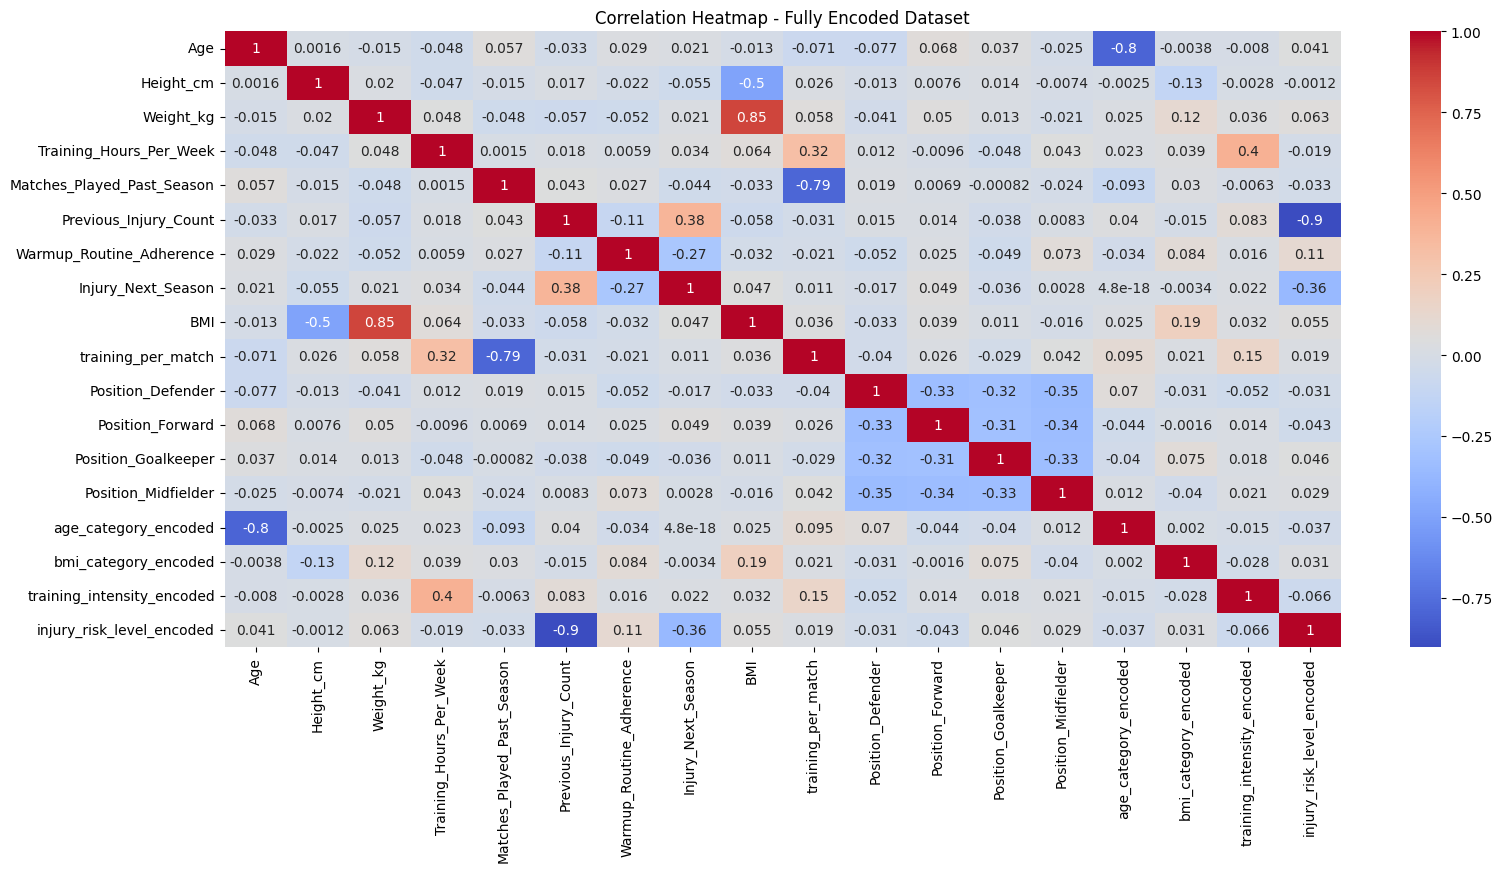

In [ ]:
plt.figure(figsize=(18, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Fully Encoded Dataset')
plt.show()

##Dropping highly correlated columns

In [ ]:
# Remove highly correlated features to reduce multicollinearity
features_to_remove = [
    'Weight_kg',                    # Correlated with BMI (0.85)
    'Previous_Injury_Count',        # Correlated with injury_risk_level_encoded (-0.9)
    'age_category_encoded',         # Correlated with Age (-0.8)
    'Matches_Played_Past_Season'    # Correlated with training_per_match (-0.79)
]

df_final = df_encoded.drop(columns=features_to_remove)
print(f"Final dataset shape: {df_final.shape}")

Final dataset shape: (800, 14)


##

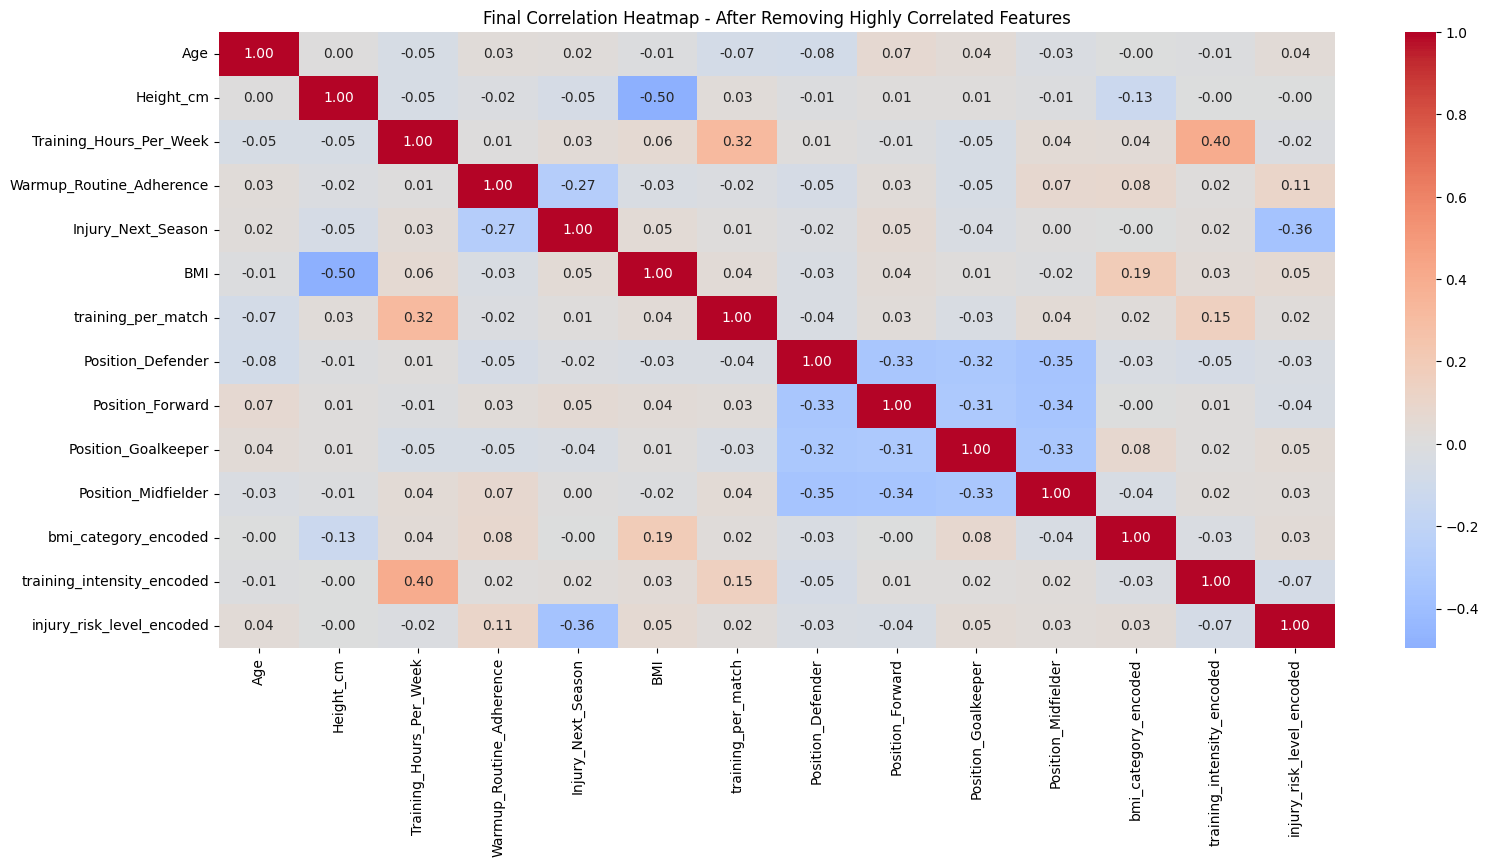

In [ ]:
# Check correlation after removing highly correlated features
plt.figure(figsize=(18, 8))
sns.heatmap(df_final.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Final Correlation Heatmap - After Removing Highly Correlated Features')
plt.show()

## Feature and Target split

In [ ]:
# identifying the target variable
X = df_final.drop(columns=['Injury_Next_Season'])
y = df_final['Injury_Next_Season']

##Split Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##Standardizing

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Define Model

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
      'Random Forest': RandomForestClassifier(),
      'Support Vector Machine': SVC(),
      'Gradient Boosting': GradientBoostingClassifier(),
      'Extra Trees': ExtraTreesClassifier(),
      'K-Neighbors': KNeighborsClassifier()
}

##Evaluate Models using cross-evaluation

In [ ]:
results = []
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='f1')
    avg_score = scores.mean()
    results.append((name, avg_score))
    print(f"{name}: {avg_score:.4f}")

# Sort results to see best model
results.sort(key=lambda x: x[1], reverse=True)
print(f"\nBest Model: {results[0][0]} with F1-score: {results[0][1]:.4f}")

Logistic Regression: 0.6587
Random Forest: 0.6073
Support Vector Machine: 0.6350
Gradient Boosting: 0.6347
Extra Trees: 0.5879
K-Neighbors: 0.5804

Best Model: Logistic Regression with F1-score: 0.6587


##Hyperparameter tuning

In [ ]:
# Hyperparameter tuning for best model (Logistic Regression)
param_grid = {
    'C': [0.1, 1, 100],
    'max_iter': [1000, 2000]
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_scaled, y_train)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best F1-score: {grid_search.best_score_:.4f}")

Best Hyperparameters: {'C': 1, 'max_iter': 1000}
Best F1-score: 0.6587


##Test Evaluation

In [ ]:
# Train best model and evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print("Test Set Results")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
print("\nClassification report")
print(classification_report(y_test, y_pred))


Test Set Results
Accuracy: 0.7125
F1-score: 0.7089

Classification report
              precision    recall  f1-score   support

           0       0.71      0.72      0.72        80
           1       0.72      0.70      0.71        80

    accuracy                           0.71       160
   macro avg       0.71      0.71      0.71       160
weighted avg       0.71      0.71      0.71       160



##Confusion Matrix

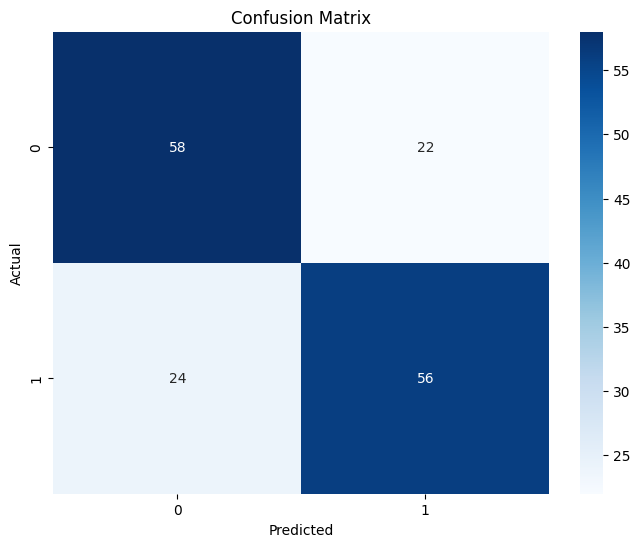

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt = 'd', cmap ='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##Future importatnce

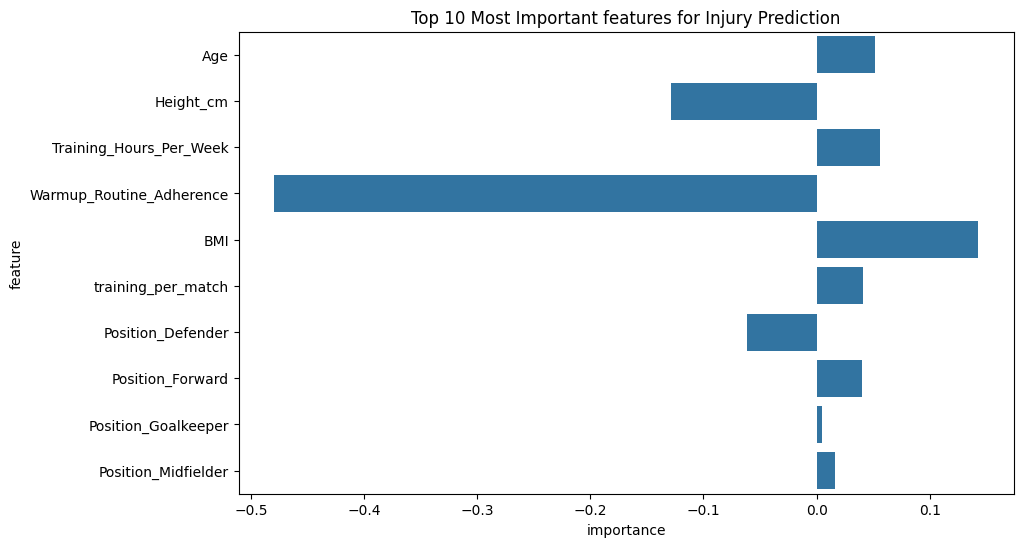

In [ ]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance':best_model.coef_[0]
})

feature_importances = feature_importance.sort_values('importance',key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important features for Injury Prediction')
plt.show()